In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '/Users/dabiyyu/Downloads/mlprocess/src')
import util as utils
import pandas as pd
import numpy as np

In [102]:
config = utils.load_config()

# Load Train Set

In [103]:
X_train = utils.pickle_load(config["train_set_path"][0])
y_train = utils.pickle_load(config["train_set_path"][1])

In [104]:
train_set = pd.concat([X_train, y_train], axis = 1)

In [105]:
# X, y = RandomUnderSampler(random_state = 42).fit_resample(X_train, y_train)
# train_set_bal = pd.concat([X, y], axis = 1)

# Data Exploration

In [106]:
# Quick take a loof to our train data
train_set

,AT,V,AP,RH,PE
8759,16.69,44.78,1010.41,58.18,456.17
1434,24.12,58.66,1011.55,58.96,450.69
7320,9.08,40.02,1031.20,75.34,476.69
2579,9.60,41.82,1032.93,72.63,475.01
9142,20.77,56.85,1012.40,83.63,442.85
...,...,...,...,...,...
5734,23.39,61.87,1010.35,48.91,444.03
5191,11.63,40.55,1022.89,87.12,474.67
5390,27.79,69.23,1012.86,45.71,435.06
860,12.26,41.50,1014.87,89.41,471.13


## AT Distribution

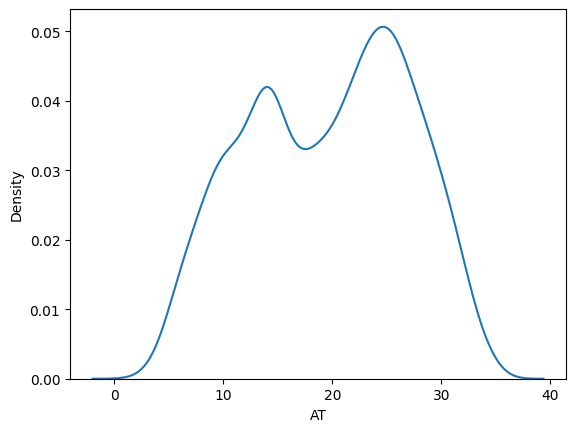

In [107]:
sns.kdeplot(data=train_set, x='AT');

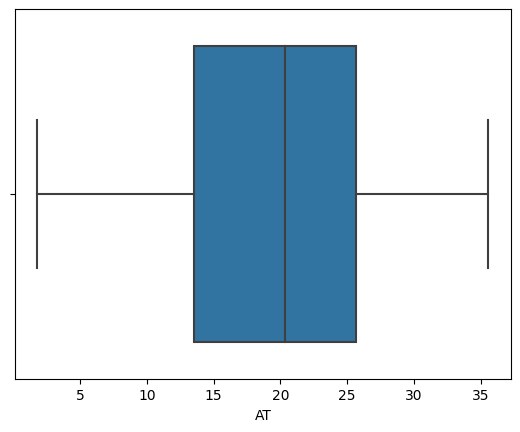

In [108]:
sns.boxplot(data = train_set, x = "AT");

## V Distribution

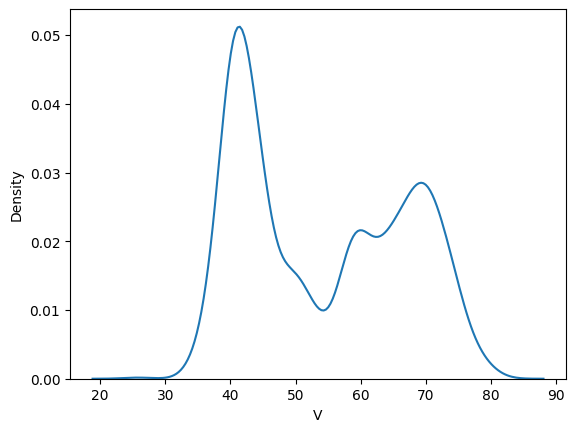

In [109]:
sns.kdeplot(data=train_set, x='V');

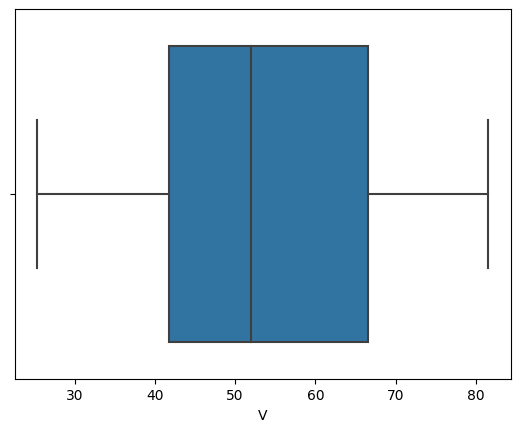

In [110]:
sns.boxplot(data = train_set, x = "V");

## AP Distribution

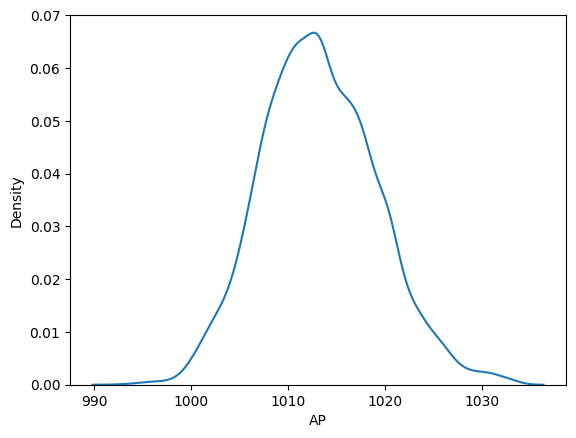

In [111]:
sns.kdeplot(data=train_set, x='AP');

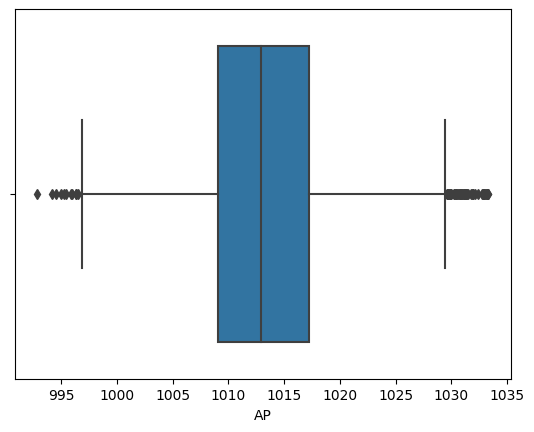

In [112]:
sns.boxplot(data = train_set, x = "AP");

In [113]:
q1 = train_set["AP"].quantile(0.25)
q3 = train_set["AP"].quantile(0.75)
iqr = q3 - q1

In [114]:
train_set_ap = train_set[~((train_set["AP"] < (q1 - 1.5 * iqr)) | (train_set["AP"] > (q3 + 1.5 * iqr)))].copy()

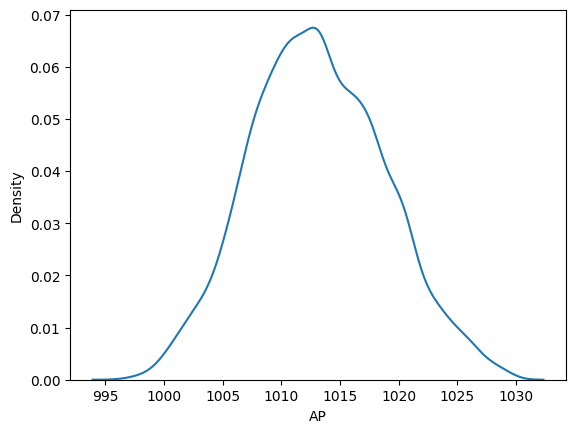

In [115]:
sns.kdeplot(data=train_set_ap, x='AP');

## RH Distribution

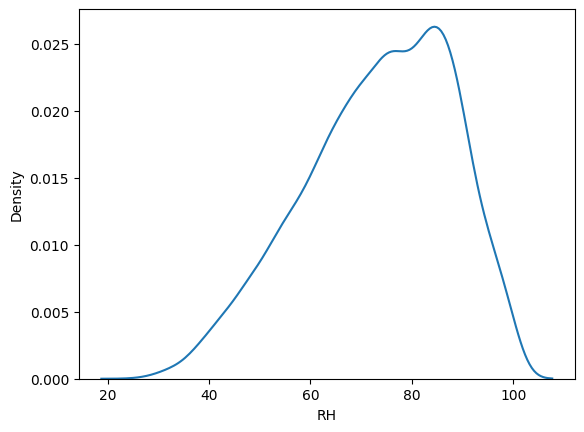

In [116]:
sns.kdeplot(data=train_set, x='RH');

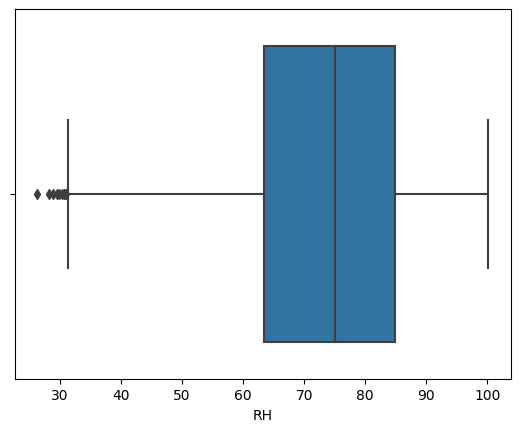

In [117]:
sns.boxplot(data = train_set, x = "RH");

In [118]:
q1 = train_set["RH"].quantile(0.25)
q3 = train_set["RH"].quantile(0.75)
iqr = q3 - q1

In [119]:
train_set_rh = train_set[~((train_set["RH"] < (q1 - 1.5 * iqr)) | (train_set["RH"] > (q3 + 1.5 * iqr)))].copy()

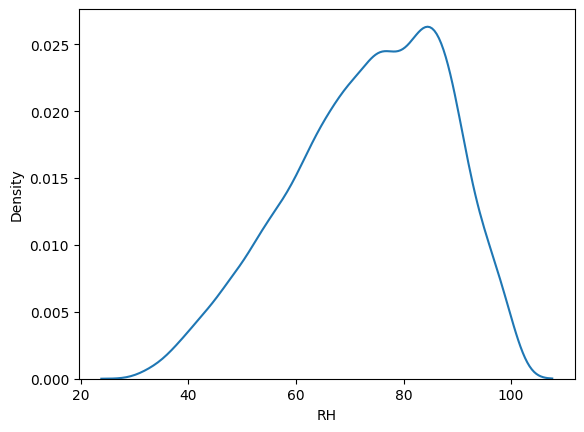

In [120]:
sns.kdeplot(data=train_set_rh, x='RH');

## Cleaned Data

In [121]:
train_set_cleaned = pd.concat([train_set_ap, train_set_rh])

In [122]:
count_duplicated_index = train_set_cleaned.index.value_counts()

In [123]:
used_index_data = count_duplicated_index[count_duplicated_index == 2].index

In [124]:
train_set_cleaned = train_set_cleaned.loc[used_index_data].drop_duplicates()

In [125]:
train_set_cleaned

,AT,V,AP,RH,PE
8759,16.69,44.78,1010.41,58.18,456.17
6965,29.83,71.43,1011.93,55.80,439.34
8897,28.23,64.05,1011.98,75.23,442.30
8473,26.22,65.34,1015.17,47.25,444.06
2978,14.57,41.79,1007.61,82.85,457.21
...,...,...,...,...,...
4663,28.18,49.30,1003.97,55.56,438.91
3258,7.62,44.71,1020.56,69.96,486.07
7670,29.03,67.79,1010.86,54.03,445.03
7594,22.27,48.98,1014.47,49.33,451.74


## Pairplot

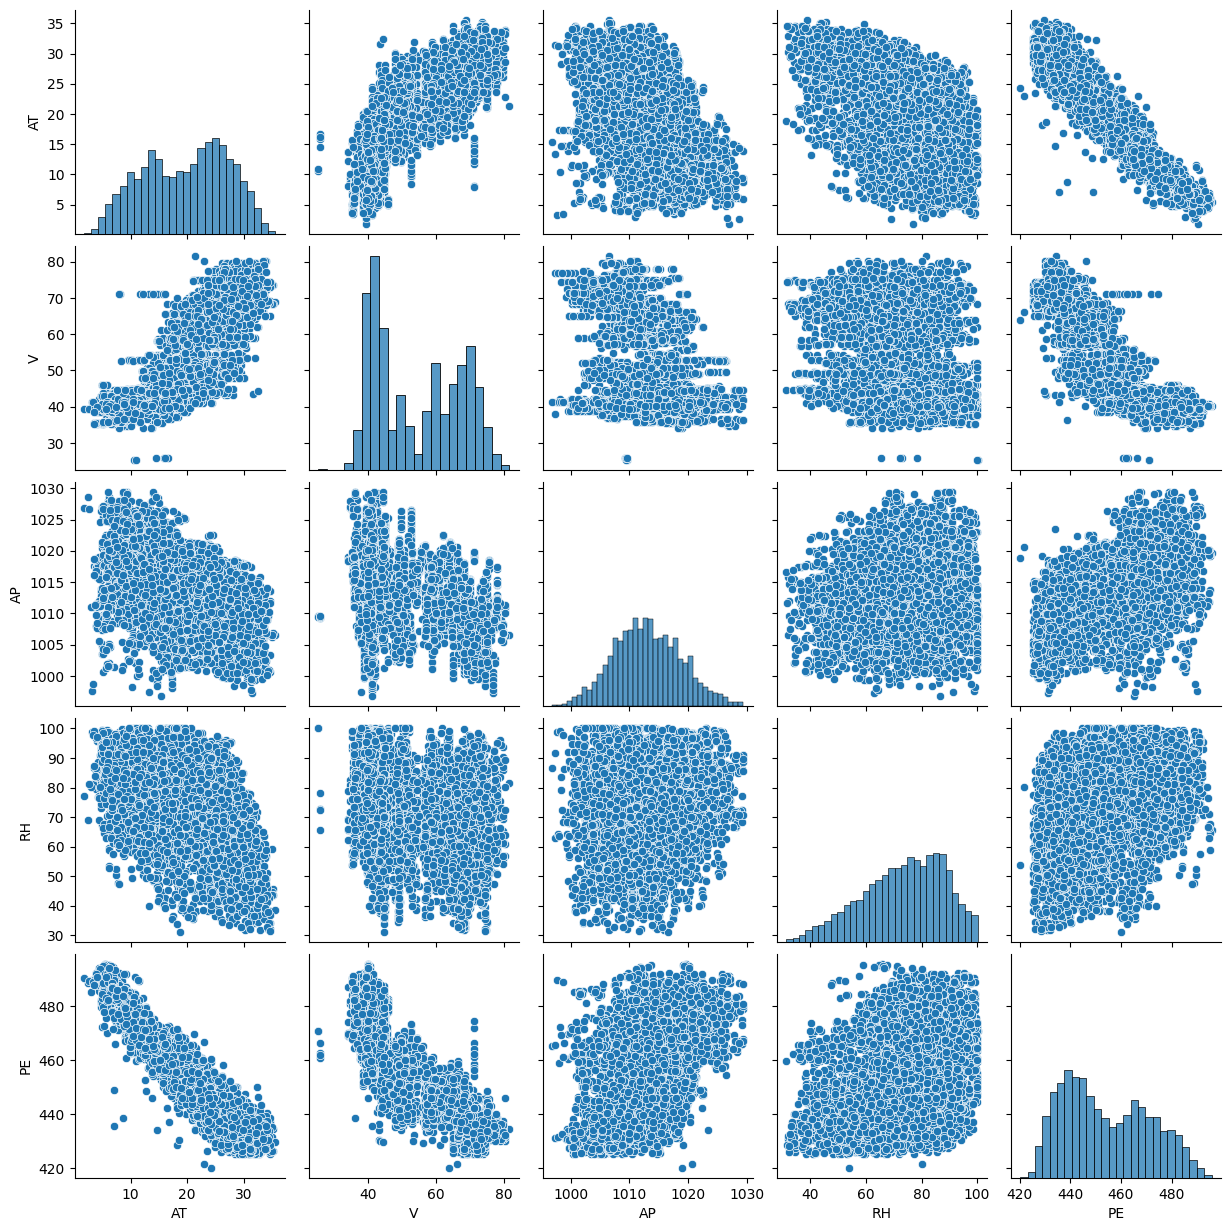

In [126]:
sns.pairplot(train_set_cleaned);

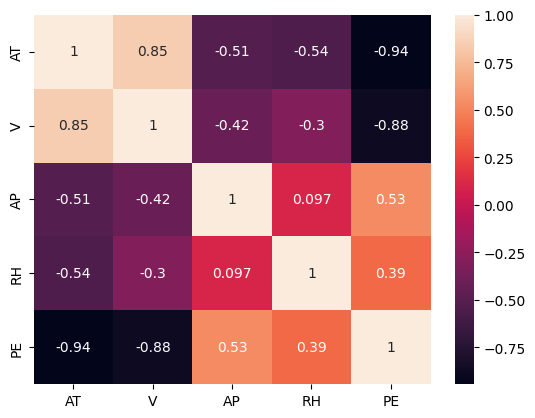

In [127]:
sns.heatmap(train_set_cleaned.corr(method='spearman'), annot=True);